# ARTIFICIAL NEURAL NETWORKS

## Classification Using Artificial Neural Networks with Hyperparameter Tuning on Alphabets Data

## Overview:

In this assignment, you will be tasked with developing a classification model using Artificial Neural Networks (ANNs) to classify data points from the "Alphabets_data.csv" dataset into predefined categories of alphabets. This exercise aims to deepen your understanding of ANNs and the significant role hyperparameter tuning plays in enhancing model performance.


### Dataset: "Alphabets_data.csv"

The dataset provided, "Alphabets_data.csv", consists of labeled data suitable for a classification task aimed at identifying different alphabets. Before using this data in your model, you'll need to preprocess it to ensure optimal performance.


## Tasks

### 1. Data Exploration and Preprocessing

* Begin by loading and exploring the "Alphabets_data.csv" dataset. Summarize its key features such as the number of samples, features, and classes.

* Execute necessary data preprocessing steps including data normalization, managing missing values.


In [32]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [2]:
df = pd.read_csv('./Alphabets_data.csv')
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [3]:
# Checking for null values
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [4]:
# Checking for Duplicated rows
df.duplicated().sum()

1332

In [5]:
df.loc[df.duplicated()]

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
627,I,3,7,4,5,2,7,7,0,7,13,6,8,0,8,1,7
724,L,3,6,3,4,1,1,0,6,6,0,1,5,0,8,0,8
730,I,1,9,0,6,0,7,7,4,4,7,6,8,0,8,0,8
910,X,5,11,6,8,2,7,7,5,4,7,6,8,3,8,4,8
943,O,2,3,2,1,1,8,7,6,4,9,6,8,2,8,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19948,T,4,5,4,4,2,6,11,2,7,11,9,4,1,11,2,4
19950,O,4,5,5,4,3,7,7,8,5,7,6,8,2,8,3,8
19975,E,1,0,1,0,0,5,8,5,7,7,6,12,0,8,6,10
19987,L,3,7,3,5,1,0,1,6,6,0,0,6,0,8,0,8


There are no such duplicated rows

In [6]:
# Checking for Feature dtypes
df.dtypes

letter    object
xbox       int64
ybox       int64
width      int64
height     int64
onpix      int64
xbar       int64
ybar       int64
x2bar      int64
y2bar      int64
xybar      int64
x2ybar     int64
xy2bar     int64
xedge      int64
xedgey     int64
yedge      int64
yedgex     int64
dtype: object

In [7]:
# Statistical Summary
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

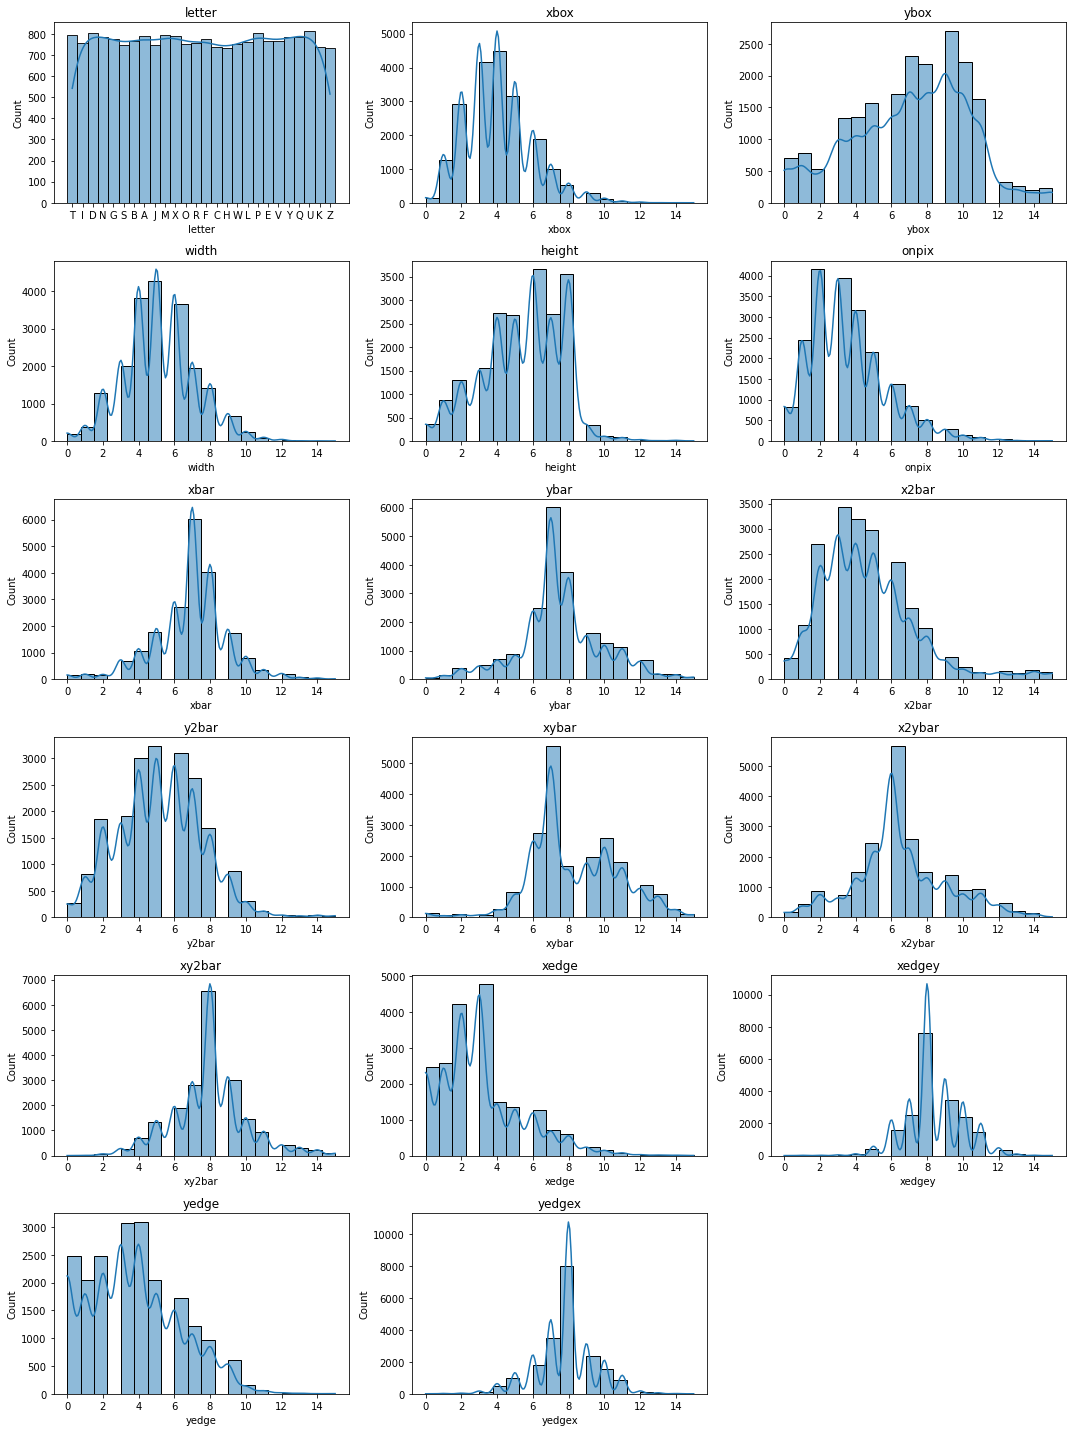

In [9]:
# Checking for distribution in features
plt.figure(figsize=(15, 20))
for i, col in enumerate(df.columns):
    plt.subplot(6, 3, i+1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

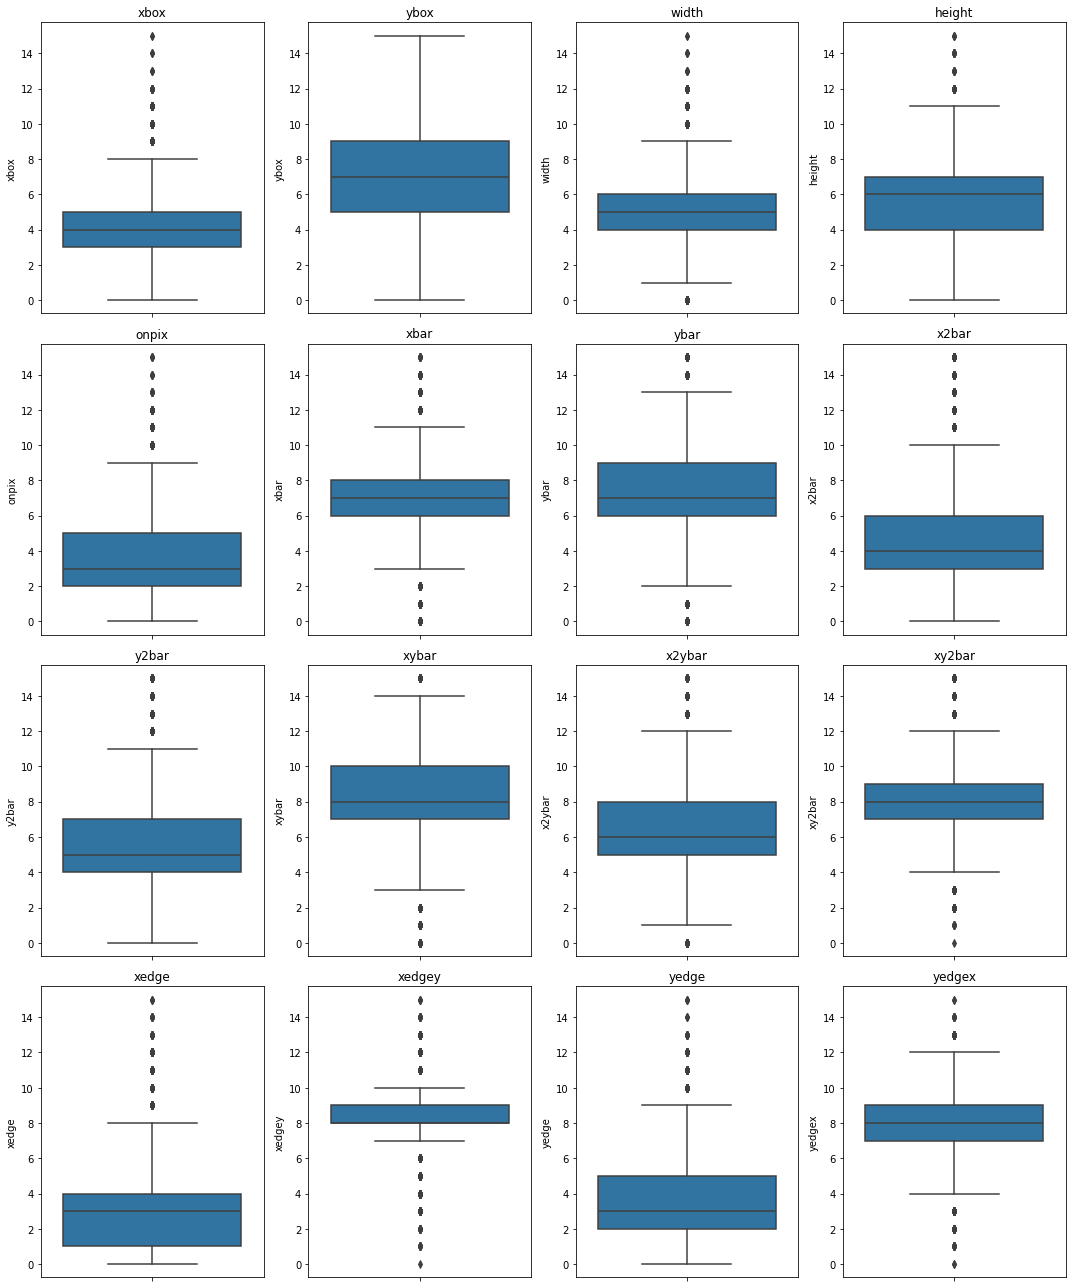

In [10]:
# Checking for Outliers using Boxplots
plt.figure(figsize=(15, 18))
for i, col in enumerate(df.columns[1:]):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

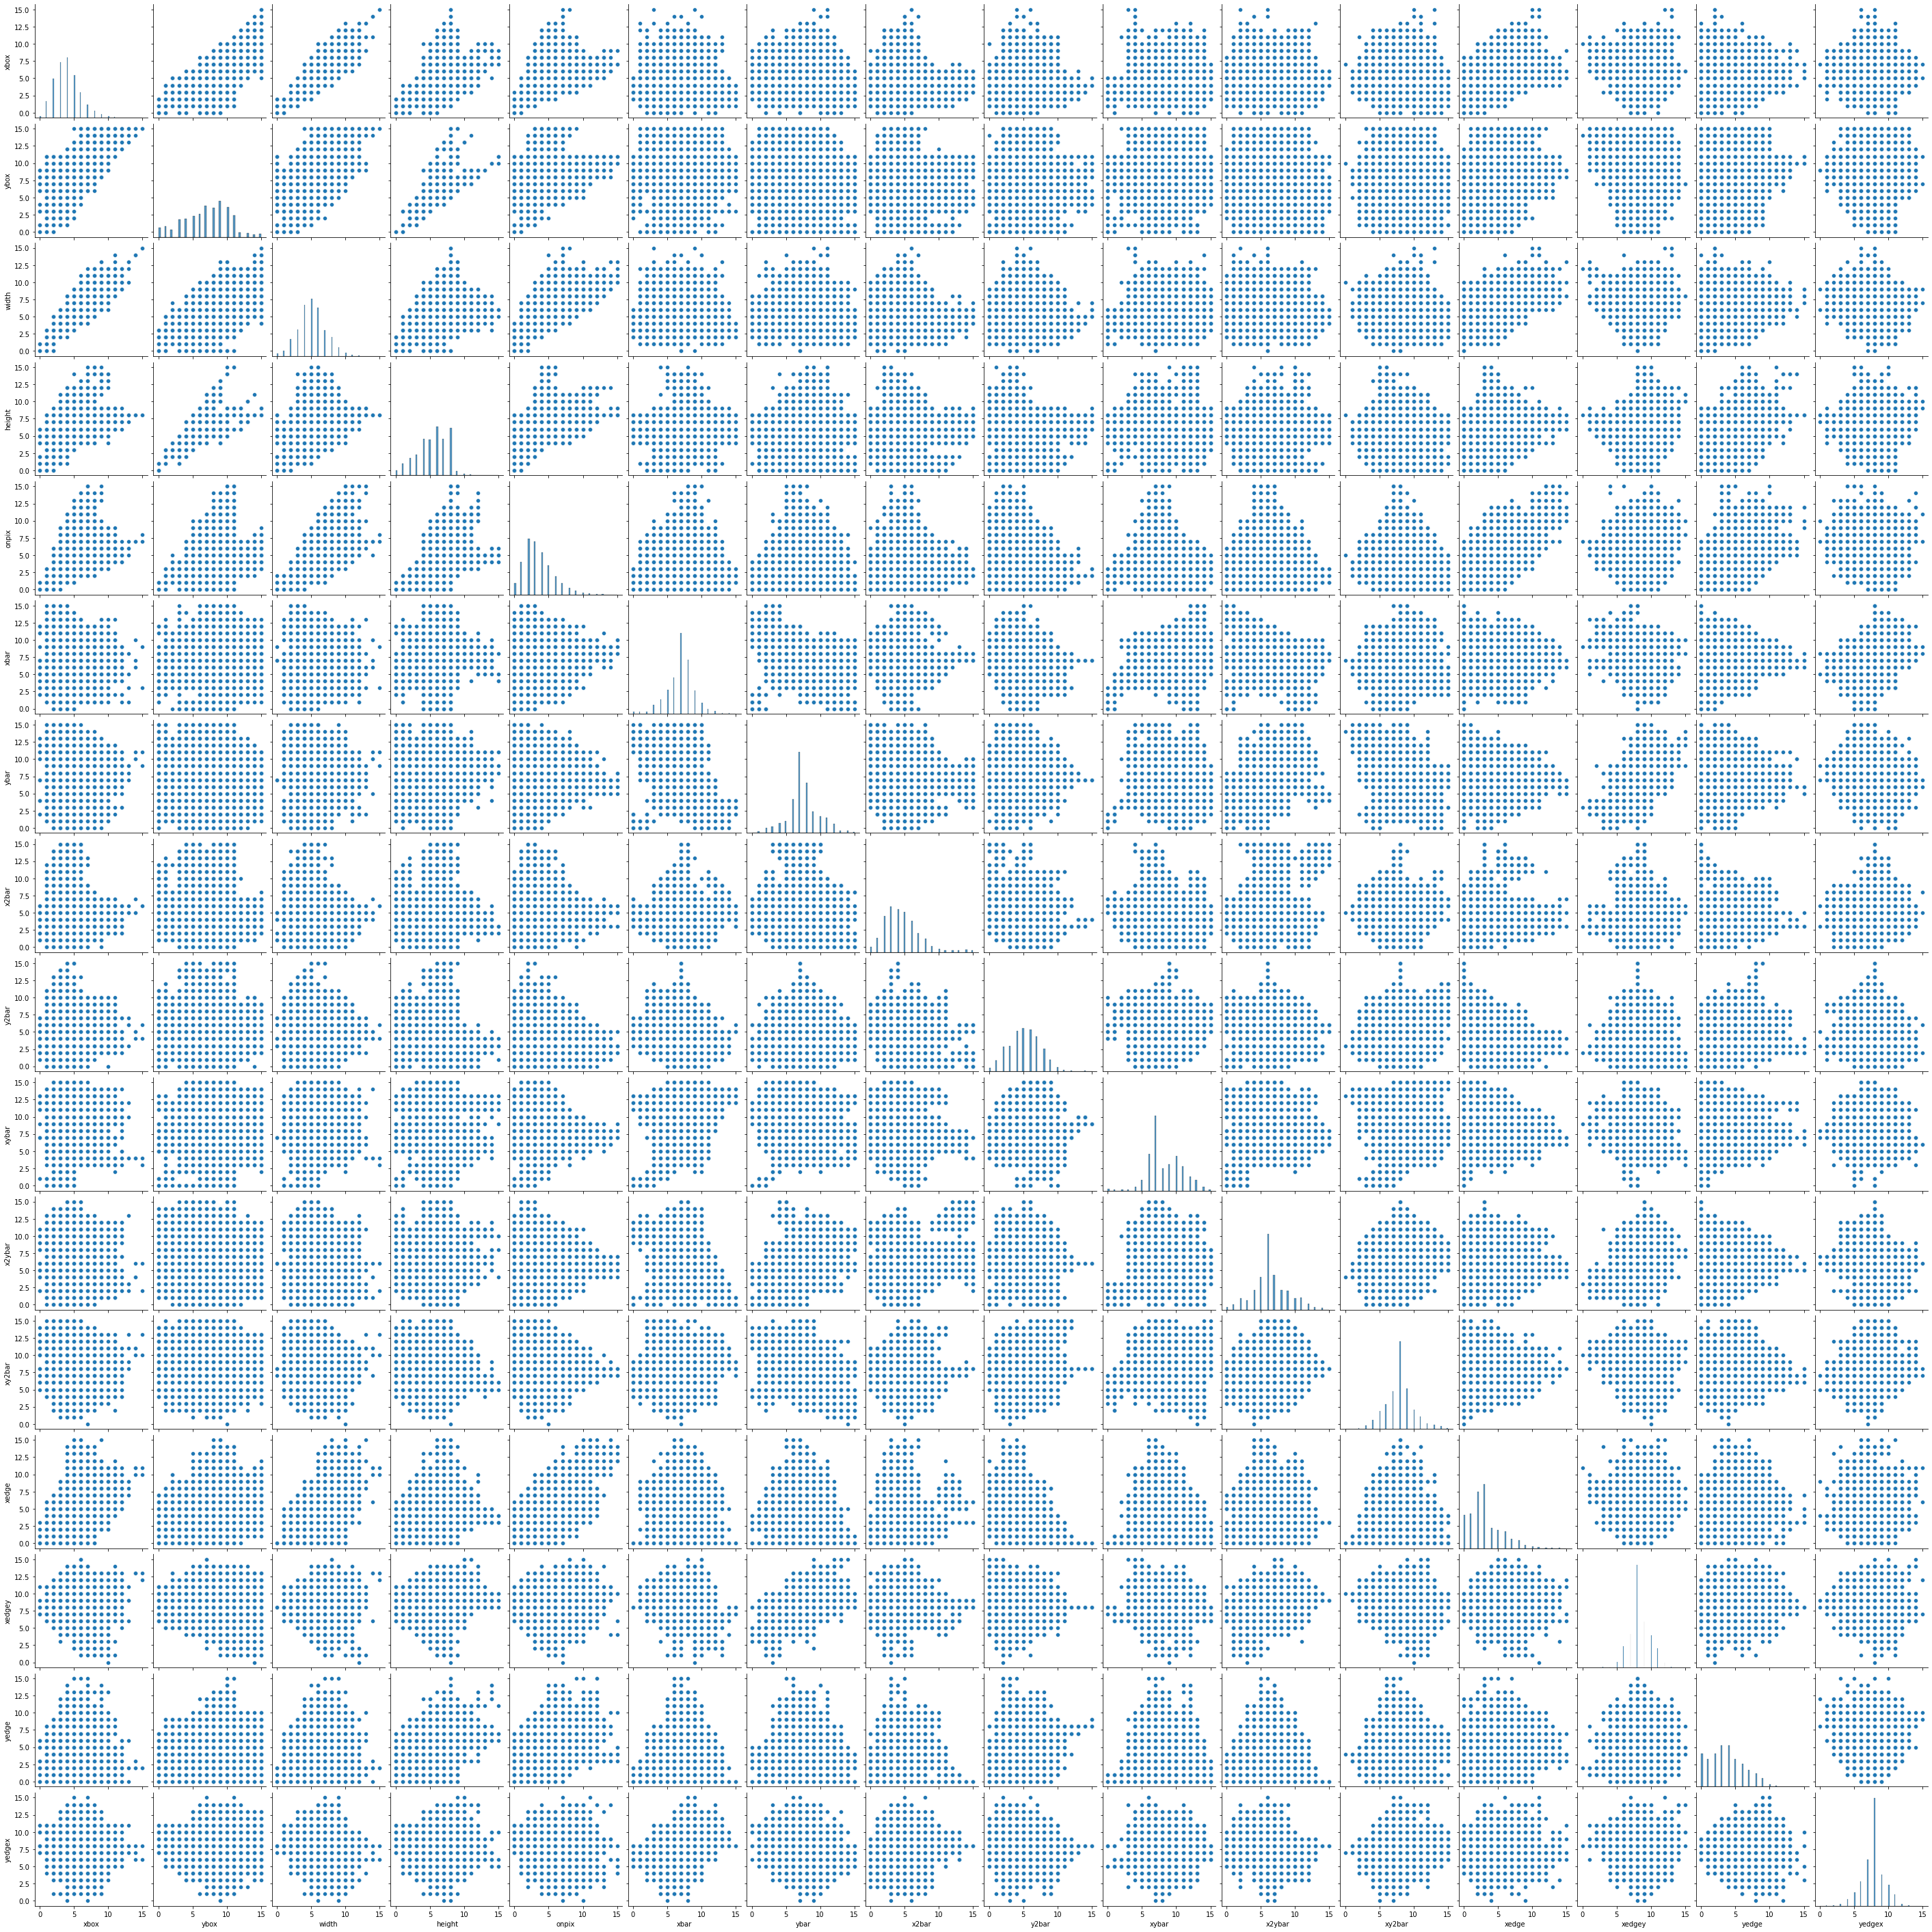

In [11]:
# Checking for Correlation
sns.pairplot(df)

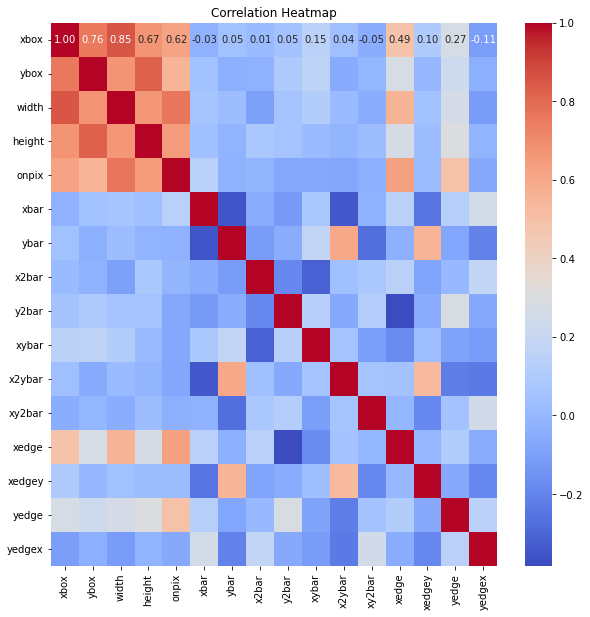

In [12]:
# Checking for correlations using heatmaps
plt.figure(figsize=(10, 10))
sns.heatmap(df.drop(columns=['letter']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [13]:
num_features = df.shape[1] - 1
num_classes = df['letter'].nunique()
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {num_features}")
print(f"Number of classes: {num_classes}")

Number of samples: 20000
Number of features: 16
Number of classes: 26


In [14]:
# Standardizing Data
from sklearn.preprocessing import StandardScaler

# Separating Features and Target
X = df.drop('letter', axis=1)
y = df['letter']

# Standardizing the feature values
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [15]:
# Encoding the target variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Converting to one-hot encoding
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
y_onehot = onehot_encoder.fit_transform(y_encoded.reshape(-1,1))

### 2. Model Implementation

* Construct a basic ANN model using your chosen high-level neural network library. Ensure your model includes at least one hidden layer.

* Divide the dataset into training and test sets.

* Train your model on the training set and then use it to make predictions on the test set.


In [16]:
# Splitting dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_onehot, test_size=0.2, random_state=42)

In [17]:
# Constructing Basic ANN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Defining Model
model = Sequential()
model.add(Dense(64, input_dim=num_features, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compling Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
400/400 [==============================] - 4s 2ms/step - loss: 1.9751 - accuracy: 0.4616 - val_loss: 1.1702 - val_accuracy: 0.6819
Epoch 2/50
400/400 [==============================] - 1s 2ms/step - loss: 0.9468 - accuracy: 0.7322 - val_loss: 0.8455 - val_accuracy: 0.7606
Epoch 3/50
400/400 [==============================] - 1s 2ms/step - loss: 0.7399 - accuracy: 0.7851 - val_loss: 0.7038 - val_accuracy: 0.7981
Epoch 4/50
400/400 [==============================] - 1s 2ms/step - loss: 0.6287 - accuracy: 0.8171 - val_loss: 0.6199 - val_accuracy: 0.8213
Epoch 5/50
400/400 [==============================] - 1s 2ms/step - loss: 0.5549 - accuracy: 0.8366 - val_loss: 0.5658 - val_accuracy: 0.8341
Epoch 6/50
400/400 [==============================] - 1s 2ms/step - loss: 0.5017 - accuracy: 0.8522 - val_loss: 0.5225 - val_accuracy: 0.8503
Epoch 7/50
400/400 [==============================] - 1s 2ms/step - loss: 0.4588 - accuracy: 0.8659 - val_loss: 0.4848 - val_accuracy: 0.8584
Epoch 

In [29]:
# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose = 0)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')

# Making Predicitions on Test Set
y_pred = model.predict(X_test)

# Converting predictions and true values from one-hot encoding to labels
y_test_labels = label_encoder.inverse_transform(y_test.argmax(axis=1))
y_pred_labels = label_encoder.inverse_transform(y_pred.argmax(axis=1))

# Calculating Evaluation Metrics
accuracy = accuracy_score(y_test_labels, y_pred_labels)
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')

parameters = {'optimizer': 'adam', 'activation': 'relu', 'epochs': 50, 'batch_size': 32}

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Test Accuracy: 0.9380000233650208
Test Loss: 0.19520151615142822
125/125 [==============================] - 0s 783us/step
Accuracy: 0.938
Precision: 0.938838076045365
Recall: 0.938
F1 Score: 0.9381440455829002


### 3. Hyperparameter Tuning

* Modify various hyperparameters, such as the number of hidden layers, neurons per hidden layer, activation functions, and learning rate, to observe their impact on model performance.

* Adopt a structured approach like grid search or random search for hyperparameter tuning, documenting your methodology thoroughly.


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model(optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [19]:
from sklearn.model_selection import KFold
import numpy as np

# Defining the hyperparameters to try
optimizers = ['adam', 'rmsprop']
activations = ['relu', 'tanh']
epochs = [50, 100]
batch_sizes = [32, 64]

# Initializing variables to store the best model and score
best_score = 0
best_params = {}

# K-fold cross-validation
kf = KFold(n_splits=3)

# Manual tuning loop
for optimizer in optimizers:
    for activation in activations:
        for epoch in epochs:
            for batch_size in batch_sizes:
                fold_accuracies = []
                
                for train_index, val_index in kf.split(X_train):
                    X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
                    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
                    
                    model = create_model(optimizer=optimizer, activation=activation)
                    model.fit(X_fold_train, y_fold_train, epochs=epoch, batch_size=batch_size, verbose=0)
                    
                    scores = model.evaluate(X_fold_val, y_fold_val, verbose=0)
                    fold_accuracies.append(scores[1])  # Accuracy is the second value returned by evaluate
                    
                average_accuracy = np.mean(fold_accuracies)
                
                if average_accuracy > best_score:
                    best_score = average_accuracy
                    best_params = {
                        'optimizer': optimizer,
                        'activation': activation,
                        'epochs': epoch,
                        'batch_size': batch_size
                    }

print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")


Best parameters: {'optimizer': 'adam', 'activation': 'relu', 'epochs': 100, 'batch_size': 32}
Best score: 0.9347501993179321


In [23]:
# Training Model with Optimized Parameters
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Building and training the optimized model
best_model = create_model(
    optimizer= best_params['optimizer'],
    activation= best_params['activation']
)

best_model.fit(
    X_train, 
    y_train, 
    epochs= best_params['epochs'], 
    batch_size=best_params['batch_size'], 
    verbose=1
)

Epoch 1/100
500/500 [==============================] - 1s 2ms/step - loss: 1.8420 - accuracy: 0.5012
Epoch 2/100
500/500 [==============================] - 1s 2ms/step - loss: 0.9155 - accuracy: 0.7414
Epoch 3/100
500/500 [==============================] - 1s 2ms/step - loss: 0.7122 - accuracy: 0.7977
Epoch 4/100
500/500 [==============================] - 1s 2ms/step - loss: 0.5925 - accuracy: 0.8289
Epoch 5/100
500/500 [==============================] - 1s 2ms/step - loss: 0.5102 - accuracy: 0.8529
Epoch 6/100
500/500 [==============================] - 1s 2ms/step - loss: 0.4507 - accuracy: 0.8652
Epoch 7/100
500/500 [==============================] - 1s 2ms/step - loss: 0.4043 - accuracy: 0.8801
Epoch 8/100
500/500 [==============================] - 1s 2ms/step - loss: 0.3650 - accuracy: 0.8945
Epoch 9/100
500/500 [==============================] - 1s 2ms/step - loss: 0.3353 - accuracy: 0.9002
Epoch 10/100
500/500 [==============================] - 1s 2ms/step - loss: 0.3122 - accura

In [27]:
# Evaluating the model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose = 0)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')

# Making Predicitions on Test SEt
y_pred_optimized = best_model.predict(X_test)

# Converting predictions and true values from one-hot encoding to labels
y_test_labels_optimized = label_encoder.inverse_transform(y_test.argmax(axis=1))
y_pred_labels_optimized = label_encoder.inverse_transform(y_pred_optimized.argmax(axis=1))

# Calculating Evaluation Metrics
accuracy_optimized = accuracy_score(y_test_labels_optimized, y_pred_labels_optimized)
precision_optimized = precision_score(y_test_labels_optimized, y_pred_labels_optimized, average='weighted')
recall_optimized = recall_score(y_test_labels_optimized, y_pred_labels_optimized, average='weighted')
f1_optimized = f1_score(y_test_labels_optimized, y_pred_labels_optimized, average='weighted')

print(f'Accuracy: {accuracy_optimized}')
print(f'Precision: {precision_optimized}')
print(f'Recall: {recall_optimized}')
print(f'F1 Score: {f1_optimized}')

Test Accuracy: 0.9480000138282776
Test Loss: 0.2112305760383606
125/125 [==============================] - 0s 872us/step
Accuracy: 0.948
Precision: 0.94890687800738
Recall: 0.948
F1 Score: 0.947926320316983


### 4. Evaluation

* Employ suitable metrics such as accuracy, precision, recall, and F1-score to evaluate your model's performance.

* Discuss the performance differences between the model with default hyperparameters and the tuned model, emphasizing the effects of hyperparameter tuning.


In [31]:
# Comparing Results from Default Parameters and Optimized Parameters
print(f'Default Hyperparameters:')
print(f'Default parameters: {parameters}\n')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

print(f'\nOptimized Parameters')
print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}\n")
print(f'Accuracy: {accuracy_optimized}')
print(f'Precision: {precision_optimized}')
print(f'Recall: {recall_optimized}')
print(f'F1 Score: {f1_optimized}')

Default Hyperparameters:
Default parameters: {'optimizer': 'adam', 'activation': 'relu', 'epochs': 50, 'batch_size': 32}

Accuracy: 0.938
Precision: 0.938838076045365
Recall: 0.938
F1 Score: 0.9381440455829002

Optimized Parameters
Best parameters: {'optimizer': 'adam', 'activation': 'relu', 'epochs': 100, 'batch_size': 32}
Best score: 0.9347501993179321

Accuracy: 0.948
Precision: 0.94890687800738
Recall: 0.948
F1 Score: 0.947926320316983


#### Analysis

* Accuracy:

    The tuned model shows an improvement in accuracy from 93.8% to 94.8%. This indicates that the model's ability to correctly classify the alphabets improved by approximately 1%.

* Precision:

    Precision improved from approximately 0.939 to 0.949. Higher precision suggests that the tuned model has fewer false positives, meaning it is better at avoiding incorrect positive classifications.

* Recall: 

    Recall increased from 0.938 to 0.948, indicating that the tuned model is better at capturing the true positive cases, which means fewer false negatives.

* F1 Score:

    The F1 score, which is the harmonic mean of precision and recall, improved from approximately 0.938 to 0.948. This balanced metric shows that both precision and recall have improved together, enhancing the overall performance.

#### Effects of Hyperparameter Tuning:

1. Increased Epochs:

    The number of epochs was increased from 50 to 100. This allowed the model more opportunities to learn from the data, leading to better generalization and improved performance. However, increasing epochs can also risk overfitting if not carefully monitored, but in this case, it resulted in better performance.

2. Consistency in Other Parameters:

    The optimizer and activation function remained the same (Adam and ReLU, respectively). This suggests that the initial choice of optimizer and activation function was suitable, but the model benefitted from a longer training period.

3. Resource Usage:

    While tuning, particularly increasing the number of epochs, uses more computational resources (time and memory), the improved performance metrics indicate that the additional resource investment was worthwhile.

4. Batch Size:

    The batch size remained at 32, indicating that this batch size was already optimal for the learning process in terms of convergence and performance.

#### Conclusion:

The tuned model demonstrates better performance across all key metrics (accuracy, precision, recall, and F1 score) compared to the model with default hyperparameters. Hyperparameter tuning, especially increasing the number of epochs, has effectively enhanced the model's ability to classify the alphabet data more accurately and reliably. This tuning process underscores the importance of carefully adjusting and validating hyperparameters to achieve the best possible model performance.